# Parkway Project Use Case 2 (Time Series Revenue Prediction)

In [81]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
#from pandas import datetime
#from matplotlib import pyplot

In [82]:
# Load the CSV file
CSV_FILE = 'ID_HospRevenue_2017_2019_ByWeek.csv'
series = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
print(series.head())

               REVENUE
Start_Date            
2017-01-01  2659489.14
2017-01-08  3760130.60
2017-01-15  2592270.63
2017-01-22  2672616.29
2017-01-29  3098990.90


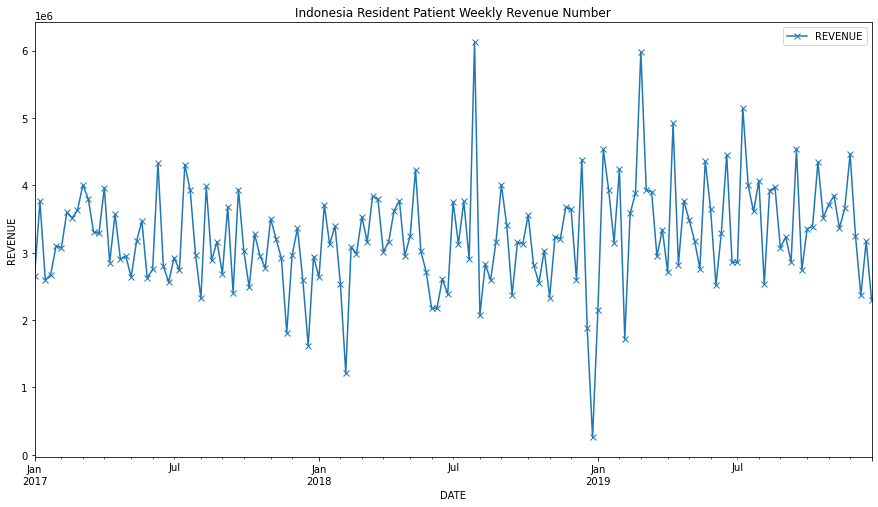

In [83]:
# Plot the time series data
series.plot(figsize=(15, 8), marker='x', title='Indonesia Resident Patient Weekly Revenue Number')
plt.xlabel('DATE')
plt.ylabel('REVENUE')
plt.show()

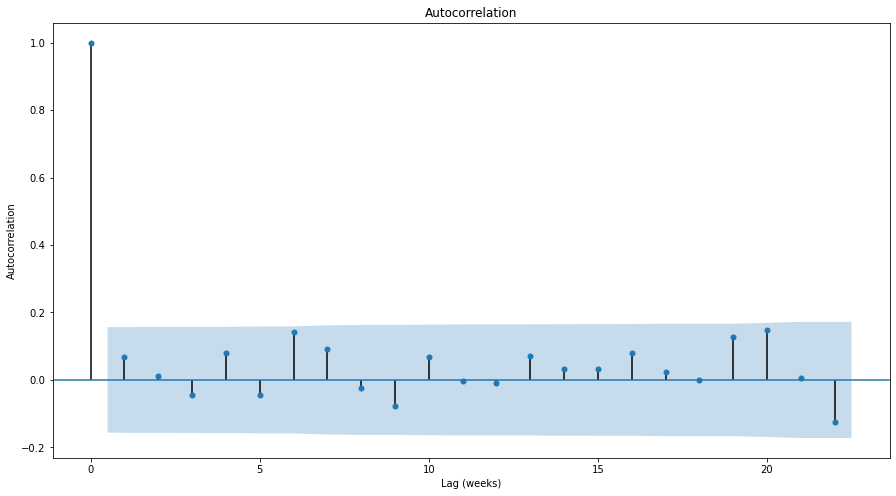

In [84]:
# Autocorrelation
#pd.plotting.autocorrelation_plot(series)
#plt.figure(figsize=(15, 8))
#plt.show()
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(series['REVENUE'], ax=ax)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag (weeks)')
plt.show()
# from the picture below we choose the first 6 lags

## Start of ARIMA model

In [85]:
# ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(6,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\HCAND\anaconda3\envs\psupr\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                REVENUE   No. Observations:                  157
Model:                     ARMA(6, 0)   Log Likelihood               -2347.966
Method:                       css-mle   S.D. of innovations         755886.626
Date:                Fri, 30 Oct 2020   AIC                           4711.932
Time:                        10:15:58   BIC                           4736.382
Sample:                    01-01-2017   HQIC                          4721.862
                         - 12-29-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.235e+06   7.55e+04     42.865      0.000    3.09e+06    3.38e+06
ar.L1.REVENUE     0.0877      0.079      1.106      0.269      -0.068       0.243
ar.L2.REVENUE    -0.0087      0.079     

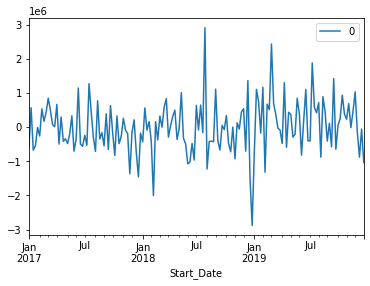

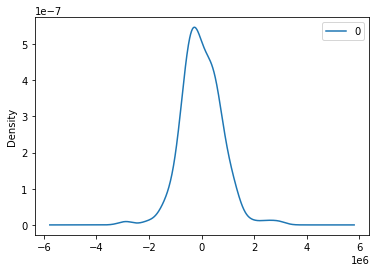

                  0
count  1.570000e+02
mean  -9.485347e+02
std    7.585214e+05
min   -2.879574e+06
25%   -4.781257e+05
50%   -5.795463e+04
75%    4.514433e+05
max    2.907925e+06


In [86]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

train size is: 103
test size is: 54
predicted=3075618.110442, expected=1876419.900000
predicted=3315915.605733, expected=255878.850000
predicted=2866272.678566, expected=2154884.430000
predicted=3144046.888878, expected=4535589.550000
predicted=3391321.560626, expected=3929627.570000
predicted=3044788.671004, expected=3149660.680000
predicted=3093490.871255, expected=4236873.880000
predicted=3496254.989160, expected=1721837.960000
predicted=2809197.283387, expected=3580960.780000
predicted=2945890.495667, expected=3881701.320000
predicted=3241747.766022, expected=5982602.470000
predicted=3055129.956407, expected=3930799.760000
predicted=3160348.311255, expected=3903346.230000
predicted=2735253.649495, expected=2945064.880000
predicted=3134686.317043, expected=3341908.450000
predicted=2962970.373646, expected=2708368.830000
predicted=3265795.106877, expected=4918707.020000
predicted=3347468.011498, expected=2821504.520000
predicted=3305804.180002, expected=3768679.430000
predicted=28940

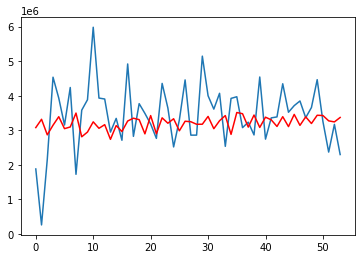

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Rolling Forecast ARIMA model
X = series.values
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
print('train size is:', size)
print('test size is:', len(X)-size)
history = [x for x in train]
predictions = list()
for t in range (len(test)):
    model = ARIMA(history,order=(6,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
error_mse = mean_squared_error(test,predictions)
error_mae = mean_absolute_error(test,predictions)
print('Test MSE: %.3f' % error_mse)
print('Test MAE: %.3f' % error_mae)

# Plot the error
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


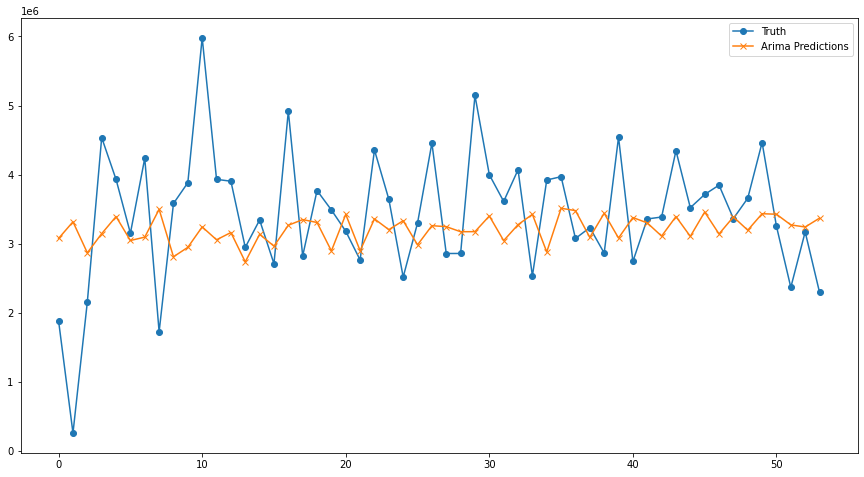

test data (actual) type is  <class 'numpy.ndarray'>
predictions data type is <class 'list'>


In [88]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(test, label='Truth', marker='o')
ax.plot(predictions, label='Arima Predictions', marker='x')
ax.legend()
plt.show()
print('test data (actual) type is ', type(test))
print('predictions data type is', type(predictions))

In [89]:
import numpy as np
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

forecast_accuracy(predictions, test)

{'mape': 0.42619692749642285,
 'me': -228466.9305391664,
 'mae': 753582.7795691834,
 'mpe': 0.1954761148314077,
 'mse': 946360530436.5908,
 'rmse': 972810.6344179173}

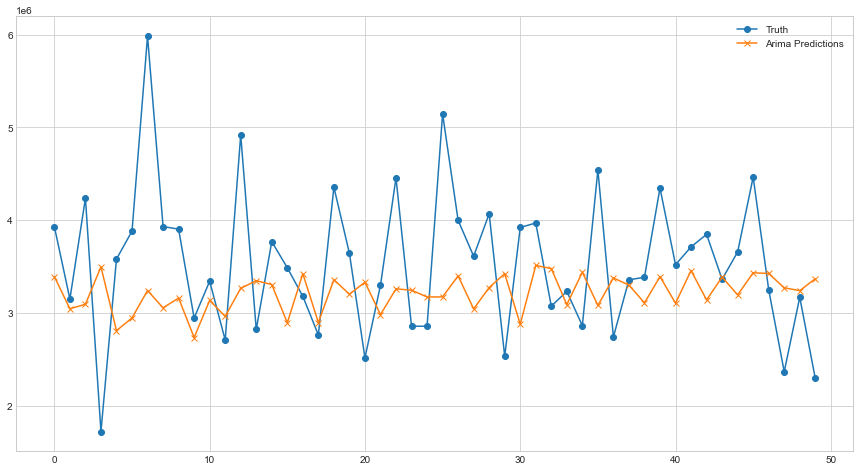

In [120]:
# This is to sync the data points with the Neural Net, need to delete some data points in ARIMA
# in Neural Net for Indonesia Model, the first 3 data points are not used, so to sync the comparison with neural net model,
# we have to create another variable test_sync_nn and predictions_sync_nn to standardize the data points
#print(test)
test_sync_nn = test[4:]
predictions_sync_nn = predictions_sync_nn = predictions[4:]

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(test_sync_nn, label='Truth', marker='o')
ax.plot(predictions_sync_nn, label='Arima Predictions', marker='x')
ax.legend()
plt.show()

In [121]:
forecast_accuracy(predictions_sync_nn, test_sync_nn)

{'mape': 0.19559368246618014,
 'me': -318325.89605470805,
 'mae': 686626.0844174443,
 'mpe': -0.04131258542954698,
 'mse': 757182062625.777,
 'rmse': 870162.0898578477}

## End of ARIMA Model

## Start of LSTM Model

In [38]:
# Load the CSV file
CSV_FILE = 'ID_HospRevenue_2017_2019_ByWeek.csv'
series = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
print(series.head())

               REVENUE
Start_Date            
2017-01-01  2659489.14
2017-01-08  3760130.60
2017-01-15  2592270.63
2017-01-22  2672616.29
2017-01-29  3098990.90


In [39]:
print(type(series))

<class 'pandas.core.frame.DataFrame'>


In [63]:
# Univariate data preparation
from numpy import array

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        #find the end of this pattern
        end_ix = i + n_steps
        #check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#Define input sequence
row_seq = series.iloc[:,0].values

#Choose the time steps
n_steps = 6

# Split into samples
X, y = split_sequence(row_seq, n_steps)

# Reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])
    
X = X.reshape((X.shape[0], X.shape[1], n_features))

print (X)

[2659489.14 3760130.6  2592270.63 2672616.29 3098990.9  3073205.85] 3597591.52
[3760130.6  2592270.63 2672616.29 3098990.9  3073205.85 3597591.52] 3514674.25
[2592270.63 2672616.29 3098990.9  3073205.85 3597591.52 3514674.25] 3628235.25
[2672616.29 3098990.9  3073205.85 3597591.52 3514674.25 3628235.25] 4006259.57
[3098990.9  3073205.85 3597591.52 3514674.25 3628235.25 4006259.57] 3800597.55
[3073205.85 3597591.52 3514674.25 3628235.25 4006259.57 3800597.55] 3307559.22
[3597591.52 3514674.25 3628235.25 4006259.57 3800597.55 3307559.22] 3286259.63
[3514674.25 3628235.25 4006259.57 3800597.55 3307559.22 3286259.63] 3962412.77
[3628235.25 4006259.57 3800597.55 3307559.22 3286259.63 3962412.77] 2853186.05
[4006259.57 3800597.55 3307559.22 3286259.63 3962412.77 2853186.05] 3570783.48
[3800597.55 3307559.22 3286259.63 3962412.77 2853186.05 3570783.48] 2901611.21
[3307559.22 3286259.63 3962412.77 2853186.05 3570783.48 2901611.21] 2949686.17
[3286259.63 3962412.77 2853186.05 3570783.48 2901611

In [64]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# Vanilla LSTM
model = Sequential()
#model.add(LSTM(200,activation='relu', input_shape=(n_steps, n_features)))
model.add(LSTM(200,activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(200,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [65]:
# Fit model
model.fit(X, y, epochs = 500, verbose = 0)


In [66]:
x_input = X
#x_input = x_input.reshape((1,n_steps,n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[2823031.8]
 [3105447.2]
 [2790783.5]
 [2956725.8]
 [3206805.2]
 [3312260.2]
 [3458817.8]
 [3454718.8]
 [3533439.8]
 [3494414.2]
 [3367629.5]
 [3212286. ]
 [3171394.2]
 [3270524.8]
 [2896231.8]
 [3043100.5]
 [2786012.2]
 [2804817.5]
 [2924539.8]
 [2876471.8]
 [2995076.2]
 [3100676.8]
 [2987928.2]
 [3368545. ]
 [2756339.5]
 [2959352.2]
 [3311833.8]
 [3406232.2]
 [3497414.8]
 [3161241.2]
 [3112156. ]
 [2871099. ]
 [3238283.2]
 [2918730.2]
 [3003417.2]
 [2867840.8]
 [3168783.2]
 [2836211.2]
 [3093746.2]
 [2842046.5]
 [2787803.8]
 [2968845.8]
 [2808460.8]
 [2831021.2]
 [2994441.8]
 [2719613.8]
 [2525790. ]
 [2558907. ]
 [2707406.2]
 [2716923.8]
 [2714521. ]
 [2648997.8]
 [3064350. ]
 [2749302.2]
 [3042290.2]
 [2791056.2]
 [2702454.5]
 [2661532.2]
 [2619632. ]
 [3133236.5]
 [3148697.8]
 [3306266.2]
 [3283462.8]
 [3428592. ]
 [3272172.8]
 [3103890.8]
 [3288265.2]
 [3332486.2]
 [3251024. ]
 [3289081.8]
 [3033543.8]
 [3147935. ]
 [2512351.8]
 [2452736.2]
 [2293257. ]
 [2766484.8]
 [3042133.2]

In [67]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mmape = np.mean(np.abs(forecast - actual)/np.abs(forecast))  # MMAPE
    return({'mape':mape, 'mmape':mmape,'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

forecast_accuracy(yhat,y)

{'mape': 0.28215573977464253,
 'mmape': 0.2101265848220044,
 'me': -73111.26900662252,
 'mae': 655677.2244489277,
 'mpe': 0.10212959482977908,
 'mse': 747111684934.8943,
 'rmse': 864356.2257165123}

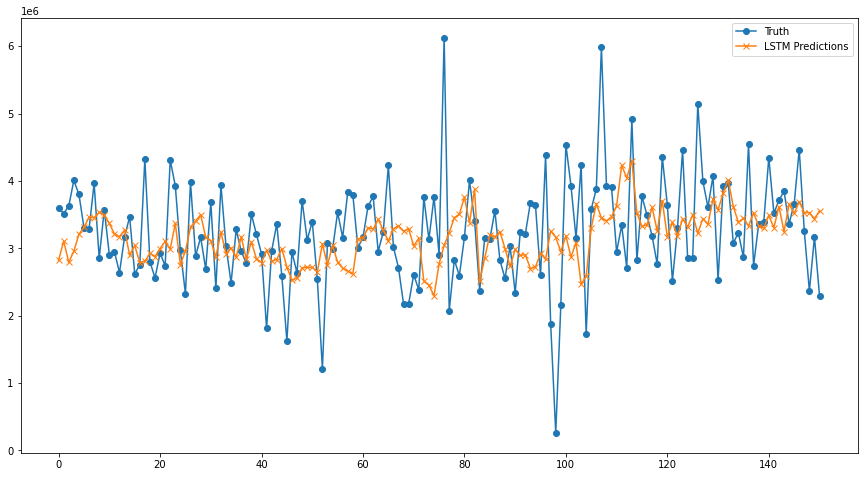

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y, label='Truth', marker='o')
ax.plot(yhat, label='LSTM Predictions', marker='x')
ax.legend()
plt.show()

## End of LSTM Model

## Start of Neural Net Model

In [91]:
# visualisation
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# dataset downloading
import io
import requests
import zipfile

# data processing
import pandas as pd

# models
from sklearn.model_selection import train_test_split
import tensorflow as tf

# for saving the processed dataset
import pickle

plt.style.use('seaborn-whitegrid')

Update `CSV_FILE` to use the correct .csv filename. Some zip files contain multiple datasets.

In [92]:
# Note: update CSV_FILE to the .csv filename from above
CSV_FILE = 'ID_HospRevenue_2017_2019_ByWeek.csv'

df = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
df.head()

,REVENUE
Start_Date,
2017-01-01,2659489.14
2017-01-08,3760130.60
2017-01-15,2592270.63
2017-01-22,2672616.29
2017-01-29,3098990.90


# Data Exploration

1. Plot the dataset
2. Compute the min, max, etc
3. Plot the autocorrelation

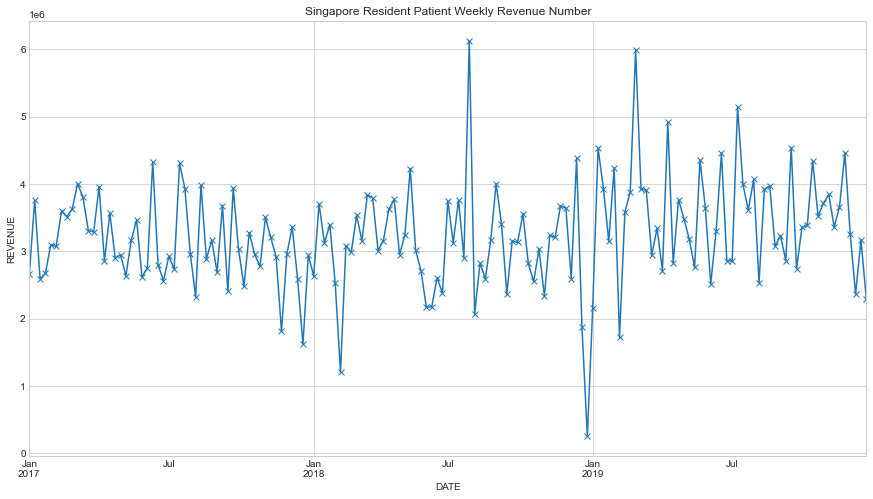

In [93]:
df['REVENUE'].plot(figsize=(15, 8), marker='x', title='Singapore Resident Patient Weekly Revenue Number')
plt.xlabel('DATE')
plt.ylabel('REVENUE')
plt.show()

In [94]:
df['REVENUE'].describe()

count    1.570000e+02
mean     3.234954e+06
std      7.739948e+05
min      2.558789e+05
25%      2.763313e+06
50%      3.163593e+06
75%      3.705695e+06
max      6.126150e+06
Name: REVENUE, dtype: float64

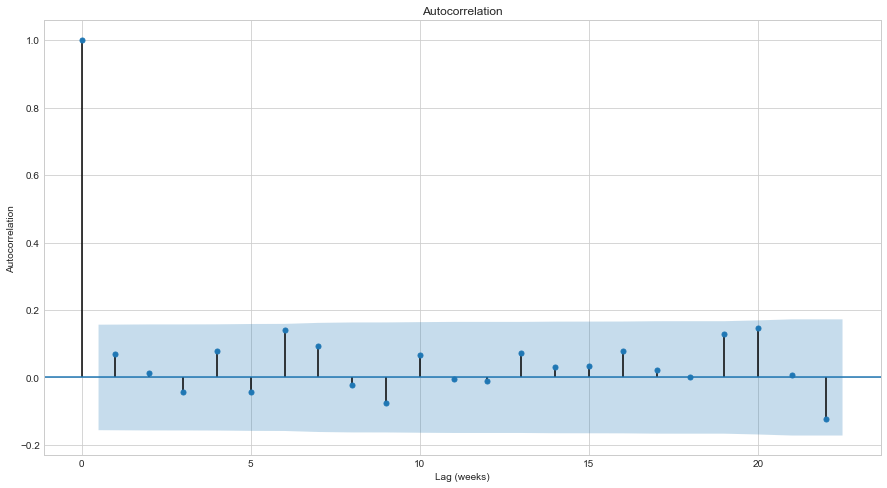

In [95]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df['REVENUE'], ax=ax)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag (weeks)')
plt.show()

In [96]:
window_size = 6 # largest number of lags above the 95% confidence band

## Windowing

1. Create shifted windows of the dataset.
2. Use this to setup our inputs and target.

In [97]:
# original dataset
df['REVENUE']

Start_Date
2017-01-01    2659489.14
2017-01-08    3760130.60
2017-01-15    2592270.63
2017-01-22    2672616.29
2017-01-29    3098990.90
                 ...    
2019-12-01    4463993.91
2019-12-08    3250925.17
2019-12-15    2366164.15
2019-12-22    3169237.36
2019-12-29    2294442.83
Name: REVENUE, Length: 157, dtype: float64

In [98]:
# shift up 1 step in time using -1
# (note the date index does not change, we'll fix that later)
df['REVENUE'].shift(-1)

Start_Date
2017-01-01    3760130.60
2017-01-08    2592270.63
2017-01-15    2672616.29
2017-01-22    3098990.90
2017-01-29    3073205.85
                 ...    
2019-12-01    3250925.17
2019-12-08    2366164.15
2019-12-15    3169237.36
2019-12-22    2294442.83
2019-12-29           NaN
Name: REVENUE, Length: 157, dtype: float64

In [99]:
# shift up in time using -2
# (note the quarter index does not change, we'll fix that later)
df['REVENUE'].shift(-2)

Start_Date
2017-01-01    2592270.63
2017-01-08    2672616.29
2017-01-15    3098990.90
2017-01-22    3073205.85
2017-01-29    3597591.52
                 ...    
2019-12-01    2366164.15
2019-12-08    3169237.36
2019-12-15    2294442.83
2019-12-22           NaN
2019-12-29           NaN
Name: REVENUE, Length: 157, dtype: float64

In [100]:
# shift up in time using -3
# (note the quarter index does not change, we'll fix that later)
df['REVENUE'].shift(-3)

Start_Date
2017-01-01    2672616.29
2017-01-08    3098990.90
2017-01-15    3073205.85
2017-01-22    3597591.52
2017-01-29    3514674.25
                 ...    
2019-12-01    3169237.36
2019-12-08    2294442.83
2019-12-15           NaN
2019-12-22           NaN
2019-12-29           NaN
Name: REVENUE, Length: 157, dtype: float64

In [101]:
# column-wise concatenation

# List comprehension, equivalent to:
# new_columns = []
# for i in range(window_size):
#    new_columns.append(df['value'].shift(-i))
new_columns = [df['REVENUE'].shift(-i) for i in range(window_size+1)]
new_column_names = [f't+{i}' for i in range(window_size+1)]

df_windowed = pd.concat(new_columns, axis=1)
df_windowed.columns = new_column_names
df_windowed

,t+0,t+1,t+2,t+3,t+4,t+5,t+6
Start_Date,,,,,,,
2017-01-01,2659489.14,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52
2017-01-08,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25
2017-01-15,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25
2017-01-22,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57
2017-01-29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57,3800597.55
...,...,...,...,...,...,...,...
2019-12-01,4463993.91,3250925.17,2366164.15,3169237.36,2294442.83,NaN,NaN
2019-12-08,3250925.17,2366164.15,3169237.36,2294442.83,NaN,NaN,NaN
2019-12-15,2366164.15,3169237.36,2294442.83,NaN,NaN,NaN,NaN


In [102]:
# cleanup the NaN at the bottom of the dataset
df_windowed.dropna(inplace=True)
df_windowed

,t+0,t+1,t+2,t+3,t+4,t+5,t+6
Start_Date,,,,,,,
2017-01-01,2659489.14,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52
2017-01-08,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25
2017-01-15,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25
2017-01-22,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57
2017-01-29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57,3800597.55
...,...,...,...,...,...,...,...
2019-10-20,4345376.96,3520102.30,3711891.75,3846633.57,3362790.16,3657010.36,4463993.91
2019-10-27,3520102.30,3711891.75,3846633.57,3362790.16,3657010.36,4463993.91,3250925.17
2019-11-03,3711891.75,3846633.57,3362790.16,3657010.36,4463993.91,3250925.17,2366164.15


In [103]:
# Formulate our problem

df_windowed.columns

Index(['t+0', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6'], dtype='object')

In [104]:
# the target we want to predict (lowercase y is a convention for a vector)
y = df_windowed['t+6']

# the input data (uppercase X is a convention for a matrix)
X = df_windowed.drop(columns=['t+6'])

X.shape, y.shape

((151, 6), (151,))

## Neural Network

1. Create a neural network using Tensorflow-Keras
2. Split the dataset into training and test sets
3. Train the neural network using the training set.
4. Evaluate the neural network using the test set.



In [105]:
# https://www.tensorflow.org/guide/keras/overview
# Create a simple Neural Network with 2 Dense Layers
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(32, input_shape=(6,), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [106]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((101, 6), (50, 6), (101,), (50,))

In [107]:
# Note that the data is shuffled in time
# This is okay because we already preserved the history!
#
# If this bothers you, you can use train_test_split(X, y, shuffle=False)
# It does affect how the Neural Network is initialised, but since we
# will be go through the dataset multiple rounds, it doesn't really matter.
#
# It may matter if your dataset is huge, because the Neural Network training
# gets more chances see the older data. 
X_train

,t+0,t+1,t+2,t+3,t+4,t+5
Start_Date,,,,,,
2017-01-01,2659489.14,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85
2017-01-08,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52
2017-01-15,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25
2017-01-22,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25
2017-01-29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57
...,...,...,...,...,...,...
2018-11-04,2333579.23,3236234.95,3208991.57,3674856.72,3643018.99,2595637.75
2018-11-11,3236234.95,3208991.57,3674856.72,3643018.99,2595637.75,4380445.37
2018-11-18,3208991.57,3674856.72,3643018.99,2595637.75,4380445.37,1876419.90


In [108]:
# What matters is that each row of X_train and each row of y_train
# are for the same quarter!
y_train

Start_Date
2017-01-01    3597591.52
2017-01-08    3514674.25
2017-01-15    3628235.25
2017-01-22    4006259.57
2017-01-29    3800597.55
                 ...    
2018-11-04    4380445.37
2018-11-11    1876419.90
2018-11-18     255878.85
2018-11-25    2154884.43
2018-12-02    4535589.55
Name: t+6, Length: 101, dtype: float64

In [109]:
# train!
# Note: if you have more data, you can split the dataset 3 ways:
#  train, validation, test
# And then use the validation set (e.g. X_val, y_val) in validation_data

model.compile(optimizer='Adam', loss='mse', metrics=['mape'])
history = model.fit(X_train, y_train, batch_size=8, epochs=250,
                    validation_data=(X_test, y_test))

Train on 101 samples, validate on 50 samples
Epoch 1/250
101/101 [==============================] - 0s 5ms/sample - loss: 8596119485166.2568 - mape: 90.0743 - val_loss: 7147687027671.0410 - val_mape: 70.8150
Epoch 2/250
101/101 [==============================] - 0s 287us/sample - loss: 3567137504144.4751 - mape: 56.7505 - val_loss: 1891757933199.3601 - val_mape: 28.5776
Epoch 3/250
101/101 [==============================] - 0s 317us/sample - loss: 1475807900175.2078 - mape: 37.2056 - val_loss: 773807176417.2800 - val_mape: 19.8768
Epoch 4/250
101/101 [==============================] - 0s 297us/sample - loss: 1011654101215.0496 - mape: 31.3119 - val_loss: 943774382161.9202 - val_mape: 19.9061
Epoch 5/250
101/101 [==============================] - 0s 346us/sample - loss: 1168996465065.8218 - mape: 35.3900 - val_loss: 1002709614592.0000 - val_mape: 20.1573
Epoch 6/250
101/101 [==============================] - 0s 318us/sample - loss: 1181949085107.9604 - mape: 36.0068 - val_loss: 89804752

101/101 [==============================] - 0s 337us/sample - loss: 752206973151.0496 - mape: 34.2270 - val_loss: 1498639913451.5200 - val_mape: 26.2576
Epoch 51/250
101/101 [==============================] - 0s 337us/sample - loss: 709398335609.6633 - mape: 30.2494 - val_loss: 1343876413521.9199 - val_mape: 24.4324
Epoch 52/250
101/101 [==============================] - 0s 366us/sample - loss: 736207975738.2970 - mape: 33.3927 - val_loss: 1303398584156.1599 - val_mape: 24.0502
Epoch 53/250
101/101 [==============================] - 0s 337us/sample - loss: 663951325772.0397 - mape: 30.1636 - val_loss: 1288164410654.7200 - val_mape: 23.9010
Epoch 54/250
101/101 [==============================] - 0s 337us/sample - loss: 657712642798.2574 - mape: 30.8907 - val_loss: 1379479757783.0400 - val_mape: 24.8421
Epoch 55/250
101/101 [==============================] - 0s 287us/sample - loss: 686845037740.3564 - mape: 30.3690 - val_loss: 1476913092362.2400 - val_mape: 25.7633
Epoch 56/250
101/101 [=

Epoch 100/250
101/101 [==============================] - 0s 307us/sample - loss: 569879560516.4357 - mape: 28.2913 - val_loss: 1421646583562.2400 - val_mape: 24.7112
Epoch 101/250
101/101 [==============================] - 0s 277us/sample - loss: 552280597209.9802 - mape: 28.4474 - val_loss: 1235990474915.8401 - val_mape: 22.7210
Epoch 102/250
101/101 [==============================] - 0s 297us/sample - loss: 653214592091.2474 - mape: 29.6487 - val_loss: 1304851177144.3201 - val_mape: 23.4316
Epoch 103/250
101/101 [==============================] - 0s 257us/sample - loss: 613923542249.1881 - mape: 29.1849 - val_loss: 1152503773921.2800 - val_mape: 21.7338
Epoch 104/250
101/101 [==============================] - 0s 287us/sample - loss: 671780486032.4752 - mape: 29.3313 - val_loss: 1393745023467.5200 - val_mape: 24.4069
Epoch 105/250
101/101 [==============================] - 0s 287us/sample - loss: 620469019678.4158 - mape: 30.6195 - val_loss: 1293261921976.3201 - val_mape: 23.3533
Epoc

101/101 [==============================] - 0s 277us/sample - loss: 625652932851.3268 - mape: 31.1853 - val_loss: 1285277173678.0801 - val_mape: 22.9956
Epoch 150/250
101/101 [==============================] - 0s 317us/sample - loss: 653273238375.9208 - mape: 29.1745 - val_loss: 1362163470827.5200 - val_mape: 23.7583
Epoch 151/250
101/101 [==============================] - 0s 257us/sample - loss: 545075759651.4851 - mape: 27.0148 - val_loss: 1393905023713.2800 - val_mape: 24.0969
Epoch 152/250
101/101 [==============================] - 0s 277us/sample - loss: 602058649153.9010 - mape: 28.3203 - val_loss: 1306795296686.0801 - val_mape: 23.2627
Epoch 153/250
101/101 [==============================] - 0s 267us/sample - loss: 604644898268.5149 - mape: 29.2602 - val_loss: 1533094924779.5200 - val_mape: 25.5290
Epoch 154/250
101/101 [==============================] - 0s 287us/sample - loss: 623925217340.8317 - mape: 30.3881 - val_loss: 1260945801216.0000 - val_mape: 22.8327
Epoch 155/250
101/

101/101 [==============================] - 0s 267us/sample - loss: 580204670043.2474 - mape: 26.9862 - val_loss: 1516266046750.7200 - val_mape: 25.7919
Epoch 199/250
101/101 [==============================] - 0s 304us/sample - loss: 572013298475.0891 - mape: 26.9418 - val_loss: 1374217890037.7600 - val_mape: 24.3913
Epoch 200/250
101/101 [==============================] - 0s 276us/sample - loss: 582232864747.7228 - mape: 27.2424 - val_loss: 1480097790689.2800 - val_mape: 25.6371
Epoch 201/250
101/101 [==============================] - 0s 284us/sample - loss: 654805674774.8119 - mape: 29.2745 - val_loss: 1590173758914.5601 - val_mape: 26.5176
Epoch 202/250
101/101 [==============================] - 0s 289us/sample - loss: 619175348122.6139 - mape: 28.3883 - val_loss: 1577262295285.7600 - val_mape: 26.2666
Epoch 203/250
101/101 [==============================] - 0s 277us/sample - loss: 585991778182.3367 - mape: 27.6305 - val_loss: 1296449661829.1201 - val_mape: 23.6474
Epoch 204/250
101/

101/101 [==============================] - 0s 257us/sample - loss: 570031412294.9703 - mape: 26.4377 - val_loss: 1348955741224.9600 - val_mape: 24.4074
Epoch 248/250
101/101 [==============================] - 0s 248us/sample - loss: 599799935989.8613 - mape: 28.9076 - val_loss: 1533212899409.9199 - val_mape: 26.0425
Epoch 249/250
101/101 [==============================] - 0s 287us/sample - loss: 569838412343.7623 - mape: 27.0392 - val_loss: 1453398761144.3201 - val_mape: 25.3062
Epoch 250/250
101/101 [==============================] - 0s 277us/sample - loss: 569453310316.9901 - mape: 28.8079 - val_loss: 1355397583994.8799 - val_mape: 24.3256


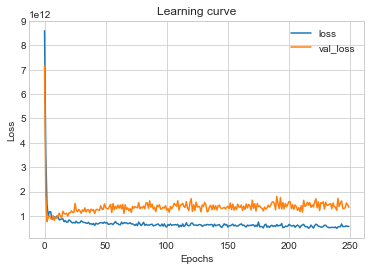

In [110]:
# Check for overfitting, which is when val_loss starts to go up but
# loss stays decreases or stays constant.

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [111]:
model.save('model_id_revenue_prediction.h5')

In [112]:
# Get a prediction from our model for our data and plot it against the truth

y_pred = model.predict(X)

df_pred = pd.DataFrame(index=X.index, data={'predictions': y_pred.ravel()})
df_pred

,predictions
Start_Date,
2017-01-01,2316255.75
2017-01-08,2384606.25
2017-01-15,2442848.75
2017-01-22,2539323.75
2017-01-29,2711333.25
...,...
2019-10-20,2784119.75
2019-10-27,2792064.75
2019-11-03,2631659.25


In [113]:
type(y_pred)

numpy.ndarray

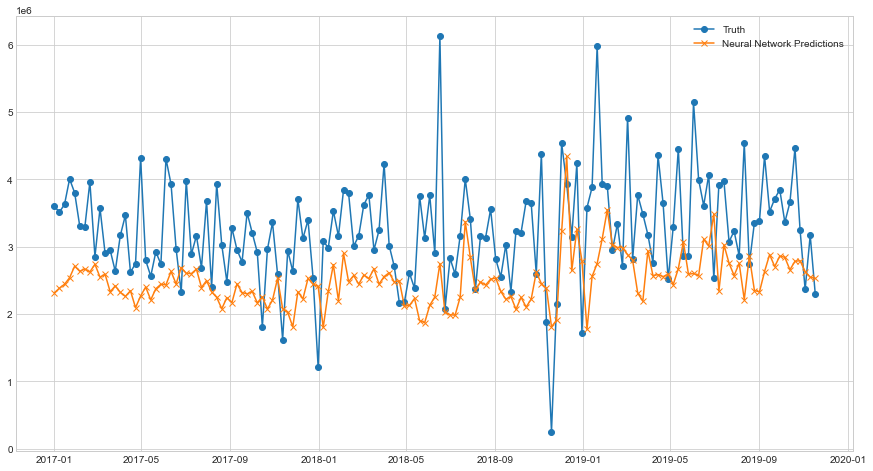

In [114]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y, label='Truth', marker='o')
ax.plot(df_pred, label='Neural Network Predictions', marker='x')
ax.legend()
plt.show()

In [115]:
full_id_with_y_and_pred = pd.concat([X,y,df_pred],axis=1)
full_id_with_y_and_pred.to_csv('full_id_revenue_with_y_and_pred.csv')

In [116]:
# Get a prediction from our model for our data and plot it against the truth

y_pred_test = model.predict(X_test)

df_pred_test = pd.DataFrame(index=X_test.index, data={'predictions': y_pred_test.ravel()})
df_pred_test

,predictions
Start_Date,
2018-12-09,4340805.000
2018-12-16,2646979.250
2018-12-23,3257784.750
2018-12-30,2791109.750
2019-01-06,1772336.625
2019-01-13,2558615.250
2019-01-20,2750811.250
2019-01-27,3118917.000
2019-02-03,3549300.750


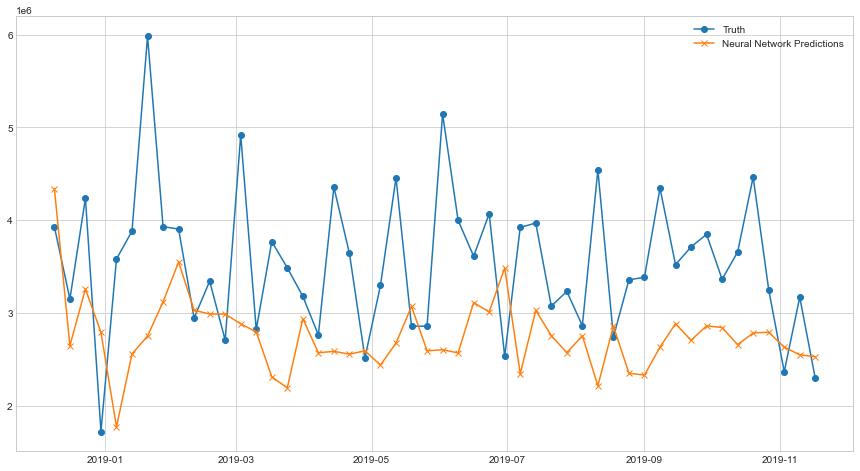

type of y_test is  <class 'pandas.core.series.Series'>
type of df_pred_test is  <class 'pandas.core.frame.DataFrame'>


In [117]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_test, label='Truth', marker='o')
ax.plot(df_pred_test, label='Neural Network Predictions', marker='x')
ax.legend()
plt.show()
print('type of y_test is ', type(y_test))
print('type of df_pred_test is ', type(df_pred_test))

In [118]:
forecast_accuracy(df_pred_test["predictions"].to_numpy(), y_test)

{'mape': 0.24325618771289775,
 'me': -776280.6005000002,
 'mae': 924442.7933,
 'mpe': -0.17941633918380334,
 'mse': 1355397545653.0679,
 'rmse': 1164215.4206387526}

In [ ]:
#{'mape': 0.42619692749642285,
# 'me': -228466.9305391664,
# 'mae': 753582.7795691834,
# 'mpe': 0.1954761148314077,
# 'mse': 946360530436.5908,
# 'rmse': 972810.6344179173}

In [119]:
print(y_test)

Start_Date
2018-12-09    3929627.57
2018-12-16    3149660.68
2018-12-23    4236873.88
2018-12-30    1721837.96
2019-01-06    3580960.78
2019-01-13    3881701.32
2019-01-20    5982602.47
2019-01-27    3930799.76
2019-02-03    3903346.23
2019-02-10    2945064.88
2019-02-17    3341908.45
2019-02-24    2708368.83
2019-03-03    4918707.02
2019-03-10    2821504.52
2019-03-17    3768679.43
2019-03-24    3486827.30
2019-03-31    3178840.69
2019-04-07    2763312.99
2019-04-14    4355402.62
2019-04-21    3642869.95
2019-04-28    2515408.01
2019-05-05    3297407.03
2019-05-12    4456440.40
2019-05-19    2856418.25
2019-05-26    2856991.52
2019-06-02    5145511.62
2019-06-09    3997744.53
2019-06-16    3611037.53
2019-06-23    4069028.31
2019-06-30    2531933.55
2019-07-07    3921209.17
2019-07-14    3969249.44
2019-07-21    3073914.51
2019-07-28    3231757.87
2019-08-04    2862841.99
2019-08-11    4541175.14
2019-08-18    2741333.15
2019-08-25    3356657.65
2019-09-01    3384929.88
2019-09-08    